In [1]:
import datetime
import mysql.connector
import operator
import numpy as np
from scipy import special

import matplotlib as mlp
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 

import plotly as py
import plotly.graph_objs as go

import ipywidgets as widgets

import pandas as pd
import datetime
import seaborn as sb

In [2]:
sb.set()

In [3]:
py.offline.init_notebook_mode(connected = True)

### Time Series Plot of Picroside III (Metabolite_id = 1287)

In [4]:
cnx = mysql.connector.connect(user='root', password='root',
                              host='127.0.0.1',
                              database='bioeco')

sql_query = pd.read_sql_query('''select bioanalysis_metabolite_price.date, bioanalysis_metabolite_price.price, bioanalysis_metabolite_price.amount, bioanalysis_metabolite_price.unity, provider.name as provider_name
                                 from bioanalysis_metabolite_price
                                 JOIN provider 
                                 on provider.id = bioanalysis_metabolite_price.provider_id
                                 where metabolite_id = 1287; ''', cnx, index_col = 'date', parse_dates=True)


df = pd.DataFrame(sql_query, columns=['price', 'amount', 'unity', 'provider_name'])
print(df)


                      price  amount unity               provider_name
date                                                                 
2017-09-29 18:30:34   553.0     5.0    mg                   ChemFaces
2017-09-29 18:30:34   228.0    20.0    mg                   ChemFaces
2017-09-29 18:30:34   262.5     1.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   337.5     2.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   412.5     3.0    mg  AnalytiCon Discovery, GmbH
...                     ...     ...   ...                         ...
2019-07-13 18:07:24   113.0     5.0    mg                   TargetMol
2019-07-13 18:07:24   553.0     5.0    mg                   ChemFaces
2019-07-13 18:07:24   228.0    20.0    mg                   ChemFaces
2019-07-13 18:07:24   467.0    20.0    mg                   Labseeker
2019-07-13 18:07:24  1833.0     1.0     g                   Labseeker

[736 rows x 4 columns]


In [5]:
df.unity.unique()

array(['mg', 'g'], dtype=object)

In [6]:
# Converter unidades 
for i in df.unity.unique():
    df.price = np.where(df.unity == i, df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
    df.amount = np.where(df.unity == i, 1, df.amount)

print(df)


                       price  amount unity               provider_name
date                                                                  
2017-09-29 18:30:34   110.60     1.0    mg                   ChemFaces
2017-09-29 18:30:34    11.40     1.0    mg                   ChemFaces
2017-09-29 18:30:34   262.50     1.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   168.75     1.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   137.50     1.0    mg  AnalytiCon Discovery, GmbH
...                      ...     ...   ...                         ...
2019-07-13 18:07:24    22.60     1.0    mg                   TargetMol
2019-07-13 18:07:24   110.60     1.0    mg                   ChemFaces
2019-07-13 18:07:24    11.40     1.0    mg                   ChemFaces
2019-07-13 18:07:24    23.35     1.0    mg                   Labseeker
2019-07-13 18:07:24  1833.00     1.0     g                   Labseeker

[736 rows x 4 columns]


In [7]:
# Converter x gramas em 1g !!
df.price = np.where(df.unity == 'g', df.price/df.amount, df.price)  # where True, yield x, otherwise yield y
df.amount = np.where(df.unity == 'g', 1, df.amount)
print(df)

                       price  amount unity               provider_name
date                                                                  
2017-09-29 18:30:34   110.60     1.0    mg                   ChemFaces
2017-09-29 18:30:34    11.40     1.0    mg                   ChemFaces
2017-09-29 18:30:34   262.50     1.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   168.75     1.0    mg  AnalytiCon Discovery, GmbH
2017-09-29 18:30:34   137.50     1.0    mg  AnalytiCon Discovery, GmbH
...                      ...     ...   ...                         ...
2019-07-13 18:07:24    22.60     1.0    mg                   TargetMol
2019-07-13 18:07:24   110.60     1.0    mg                   ChemFaces
2019-07-13 18:07:24    11.40     1.0    mg                   ChemFaces
2019-07-13 18:07:24    23.35     1.0    mg                   Labseeker
2019-07-13 18:07:24  1833.00     1.0     g                   Labseeker

[736 rows x 4 columns]


In [8]:
#See results grouped by provider_name
grouped_df = df.groupby(['unity','provider_name'])

for key, item in grouped_df:
    print('Unity, Provider:', key)
    print(grouped_df.get_group(key), "\n\n")

Unity, Provider: ('g', 'Astatech Inc')
                     price  amount unity provider_name
date                                                  
2018-01-07 19:56:11  400.0     1.0     g  Astatech Inc
2018-01-07 19:56:11  240.0     1.0     g  Astatech Inc
2018-02-09 16:13:21  400.0     1.0     g  Astatech Inc
2018-02-09 16:13:21  240.0     1.0     g  Astatech Inc
2018-02-09 16:13:24  400.0     1.0     g  Astatech Inc
2018-02-09 16:13:24  240.0     1.0     g  Astatech Inc
2018-03-09 18:30:58  400.0     1.0     g  Astatech Inc
2018-03-09 18:30:58  240.0     1.0     g  Astatech Inc
2018-04-09 20:06:05  400.0     1.0     g  Astatech Inc
2018-04-09 20:06:05  240.0     1.0     g  Astatech Inc
2018-04-09 20:06:07  400.0     1.0     g  Astatech Inc
2018-04-09 20:06:07  240.0     1.0     g  Astatech Inc
2018-05-10 00:47:15  400.0     1.0     g  Astatech Inc
2018-05-10 00:47:15  240.0     1.0     g  Astatech Inc
2018-06-11 14:47:26  400.0     1.0     g  Astatech Inc
2018-06-11 14:47:26  240.0

('g', 'Astatech Inc')
date
2018-01-07 19:56:11    400.0
2018-01-07 19:56:11    240.0
2018-02-09 16:13:21    400.0
2018-02-09 16:13:21    240.0
2018-02-09 16:13:24    400.0
2018-02-09 16:13:24    240.0
2018-03-09 18:30:58    400.0
2018-03-09 18:30:58    240.0
2018-04-09 20:06:05    400.0
2018-04-09 20:06:05    240.0
2018-04-09 20:06:07    400.0
2018-04-09 20:06:07    240.0
2018-05-10 00:47:15    400.0
2018-05-10 00:47:15    240.0
2018-06-11 14:47:26    400.0
2018-06-11 14:47:26    240.0
2018-07-11 14:47:55    400.0
2018-07-11 14:47:55    240.0
2018-08-22 19:40:26    400.0
2018-08-22 19:40:26    240.0
2018-09-22 19:43:29    400.0
2018-09-22 19:43:29    240.0
Name: price, dtype: float64
('g', 'Labseeker')
date
2017-09-29 18:30:34    1833.0
2017-12-07 19:55:59    1833.0
2018-01-07 19:56:08    1833.0
2018-02-09 16:13:19    1833.0
2018-03-09 18:30:57    1833.0
2018-04-09 20:06:03    1833.0
2018-05-10 00:47:13    1833.0
2018-05-10 00:47:13    1833.0
2018-06-11 14:47:24    1833.0
2018-06-11 14

Text(0, 0.5, 'Price (USD)')

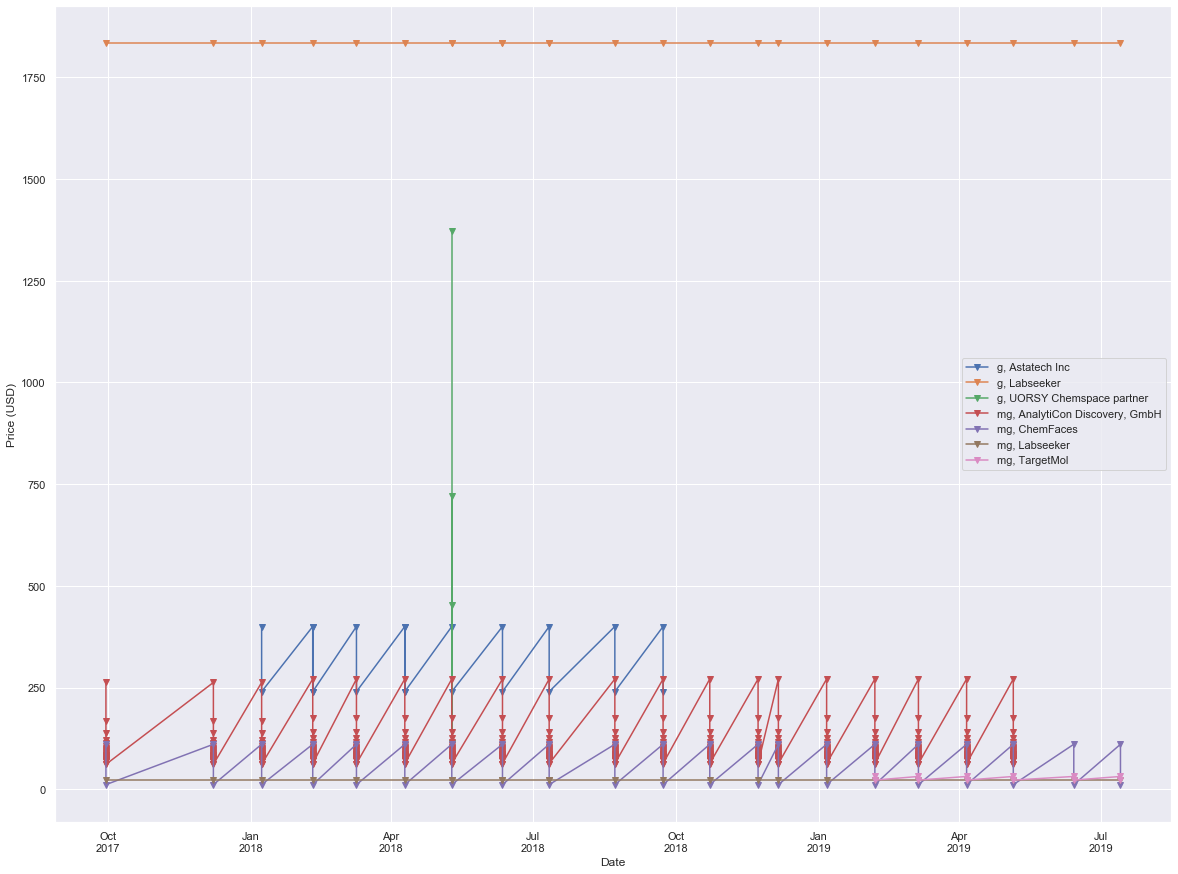

In [11]:
#Create plot!!
df = df.sort_index()

fig, ax = plt.subplots(figsize=(20, 15))
for k,g in df.groupby(['unity','provider_name'])['price']:
    ax.plot_date(pd.to_datetime(g.index),g,'v-',label="{}, {}".format(*k))

#ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
ax.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
#plt.show()

In [10]:
#Create plot with plotly

df = df.sort_index()


layout = go.Layout(
    title = 'Time Series Plot of Picroside III',
    yaxis = dict(
        title = 'price(USD)'
    ),
    xaxis = dict(
        title = 'date'
    )
)


opt_list = []
for key, item in grouped_df:
#     print('key:', key)
    opt_list.append(str(key[0] + ' ' + key[1]))

# print('opt_list:', opt_list)
    

d_x = {}
d_y = {}
for k,g in df.groupby(['unity','provider_name'])['price']:
    x = pd.to_datetime(g.index)
    y = g.values
    k = str(k[0] + ' ' + k[1])
#     print('k: ', k)
    if k not in d_x and k not in d_y:
        d_x[k] = x
        d_y[k] = y
#         print(d_x)
#         print(d_y)
    elif k in d_x and k in d_y:
        d_x[k].append(x)
        d_y[k].append(y)
    else: print('There is a unity,provider lacking on the x or y dict.')
    
    
def update_plot(unity):#, freq):
   data = []
   for s in unity:
       trace1 = go.Scatter(
           x = d_x[s],
           y = d_y[s],
           mode = 'lines',
           name = '{}'.format(s),
           line = dict(
               shape = 'spline' #smooth line
           )
       )
       data.append(trace1)
    
   fig = go.Figure(data = data, layout= layout)
   py.offline.iplot(fig)

    
unity = widgets.SelectMultiple(options = opt_list, description = 'Unity, Prov') #value = key_list,
#freq = widgets.FloatSlider(min=1, max=20, value=1, description = 'Freq')
widgets.interactive(update_plot, unity = unity )#, freq = freq)

interactive(children=(SelectMultiple(description='Unity, Prov', options=('g Astatech Inc', 'g Labseeker', 'g U…

Aqui é possível ver como o provider UORSY tem vários valores para o mesmo dia e mais nada. Provavelmente só se retirou valores deste dia para este provider mas em diferentes unidades e ao normalizar para 1g ficou como se vê estranho. JÁ VI QUE NÃO É ESTE O CASO!!

RESPOSTA: retirou-se mais do que um valor para aquele dia para diferentes amounts de gramas